## Cavity Flow 
$
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} = -\frac{1}{p}\frac{\partial p}{\partial x} + v(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2})
$
, For x direction 

$
\frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} = -\frac{1}{p}\frac{\partial p}{\partial y} + v(\frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2})
$
, For y direction 


Poisson Equation for pressure and velocity for low viscosity
$
\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = - \rho[(\frac{\partial u}{\partial x})^2 + 2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x} + (\frac{\partial v}{\partial y})^2]
$

let dx = dy = h

IC and BC:

$u,v,p = 0$

$u = 1$ at $y = 2$ else $u,v = 0$

$\frac{\partial p}{\partial y} = 0$ at $y = 0$

$p = 0$ at $y = 2$ 

$\frac{\partial p}{\partial x} = 0$ at $x = 0,2$

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, cm
from mpl_toolkits.mplot3d import Axes3D  

In [190]:
#constant 
nu = 0.1           # viscoity nu
rho = 1
x_max = 2
y_max = x_max
nx = 30
ny = nx
dx = x_max / (nx)
dy = y_max / ny 
T = 5
nt = 200
dt = T / nt
xs = np.linspace(0, x_max, nx)
ys = np.linspace(0, y_max, ny)
X, Y = np.meshgrid(xs, ys)

h = dx

# init 
u_init = np.zeros((ny,nx))
v_init = np.zeros((ny,nx))
p_init = np.zeros((ny,nx))
b_init = np.zeros((ny,nx))

dt = 0.01 


In [196]:
# possion pressure 
v0 = v_init.copy()
u0 = u_init.copy()
p0 = p_init.copy()


def create_B(b0,u,v,rho,dt,dx,dy):
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            b0[i,j] = -rho*(((u[i+1,j]-u[i-1,j])/(2*dx))**2 + 2*((u[i,j+1]-u[i,j-1])/(2*dy) * (v[i+1,j]-v[i-1,j])/(2*dx)) + ((v[i,j+1]-v[i,j-1])/(2*dy))**2)
    return b0

def possion(p0,b,nt):
    for _ in range(nt):
        p = p0.copy()
        for i in range(1,nx-1):
            for j in range(1,ny-1):
                p0[i,j] = 1/4 * (p[i+1,j] + p[i-1,j] + p[i,j+1] +p[i,j-1] - b[i,j]*dy*dx)
        
        p0[-1,:] = 0
        p0[0,:] =  p0[1,:]
        p0[:,0] = p0[:,1]
        p0[:,-1] = p0[:,-2] 
    return p0

# def create_B(b0,u,v,rho,dt,dx,dy):
#     h = dx
#     for i in range(1,nx-1):
#         for j in range(1,ny-1):
#             b0[i,j] = rho/4*((u[i+1,j]-u[i-1,j])**2 + 4*h*((u[i,j+1]-u[i,j-1])) * (v[i+1,j]-v[i-1,j]) + (v[i,j+1]-v[i,j-1])**2)
#     return b0

# def possion(p0,b,nt):
#     for _ in range(nt):
#         p = p0.copy()
#         for i in range(1,nx-1):
#             for j in range(1,ny-1):
#                 p0[i,j] = 1/4 * (p[i+1,j] + p[i-1,j] + p[i,j+1] +p[i,j-1] + b[i,j])
        
#                 p0[-1,:] = 0
#                 p0[0,:] =  p0[1,:]
#                 p0[:,0] = p0[:,1]
#                 p0[:,-1] = p0[:,-2] 
#     return p0
# # print(create_B(u0,v0,rho,dt,dx,dy))


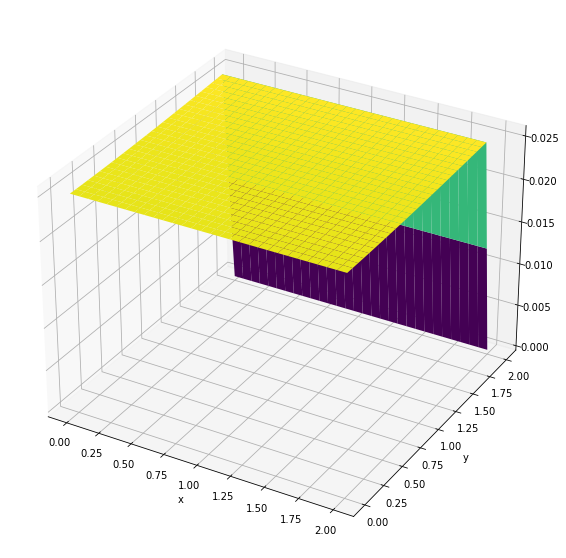

In [192]:
# finite difference 
v0 = v_init.copy()
u0 = u_init.copy()
p0 = p_init.copy()
b0 = b_init.copy()

# velocity field
for _ in range(100):
    v = v0.copy()
    u = u0.copy()
    p = p0.copy()
    
    b = create_B(b0,u0,v0,rho,dt,dx,dy)
    p0 = possion(p0,b,50)

    # print(b)
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u0[i,j] = u[i,j] - u[i,j]*(dt/dx)*(u[i,j] - u[i-1,j]) - v[i,j]*(dt/dy)*(u[i,j] - u[i,j-1])- dt/(rho*2*dx) * (p0[i+1,j] - p0[i-1,j]) + nu * (dt/dx**2) *(u[i+1,j] -2*u[i,j]+u[i-1,j]) + nu * (dt/dy**2) *(u[i,j+1]-2*u[i,j]+u[i,j-1])
            v0[i,j] = v[i,j] - u[i,j]*(dt/dx)*(v[i,j] - v[i-1,j]) - v[i,j]*(dt/dy)*(v[i,j] - v[i,j-1])- dt/(rho*2*dy) * (p0[i,j+1] - p0[i,j-1]) + nu * (dt/dx**2) *(v[i+1,j] -2*v[i,j]+v[i-1,j]) + nu * (dt/dy**2) *(v[i,j+1]-2*v[i,j]+v[i,j-1])



            u[-1,:] = 1
            u[0,:] = 0
            u[:,-1] = 0
            u[:,0] = 0
            v[-1,:] = 0
            v[0,:] = 0
            v[:,-1] = 0
            v[:,0] = 0


fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')                     
X, Y = np.meshgrid(xs, ys)                            
surf = ax.plot_surface(X, Y, p ,cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()




MovieWriter ffmpeg unavailable; using Pillow instead.


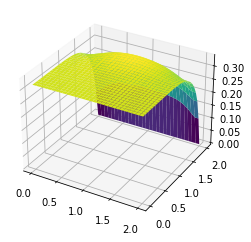

In [197]:
v0 = v_init.copy()
u0 = u_init.copy()
p0 = p_init.copy()
b0 = b_init.copy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, p0, cmap=cm.viridis)


def animate(frames,p0,surf):
    v = v0.copy()
    u = u0.copy()
    p = p0.copy()
    b = create_B(b0,u0,v0,rho,dt,dx,dy)
    p0 = possion(p0,b,50)

    # print(b)
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u0[i,j] = u[i,j] - u[i,j]*(dt/dx)*(u[i,j] - u[i-1,j]) - v[i,j]*(dt/dy)*(u[i,j] - u[i,j-1])- dt/(rho*2*dx) * (p0[i+1,j] - p0[i-1,j]) + nu * (dt/dx**2) *(u[i+1,j] -2*u[i,j]+u[i-1,j]) + nu * (dt/dy**2) *(u[i,j+1]-2*u[i,j]+u[i,j-1])
            v0[i,j] = v[i,j] - u[i,j]*(dt/dx)*(v[i,j] - v[i-1,j]) - v[i,j]*(dt/dy)*(v[i,j] - v[i,j-1])- dt/(rho*2*dy) * (p0[i,j+1] - p0[i,j-1]) + nu * (dt/dx**2) *(v[i+1,j] -2*v[i,j]+v[i-1,j]) + nu * (dt/dy**2) *(v[i,j+1]-2*v[i,j]+v[i,j-1])



            u[-1,:] = 1
            u[0,:] = 0
            u[:,-1] = 0
            u[:,0] = 0
            v[-1,:] = 0
            v[0,:] = 0
            v[:,-1] = 0
            v[:,0] = 0
    ax.clear()
    surf = ax.plot_surface(X, Y, p0, cmap=cm.viridis)

    return surf,


anim = animation.FuncAnimation(fig,animate,fargs=(p0,surf) , frames=100, repeat = True)
anim.save('cavity pressure.gif', fps = 20)
plt.show()

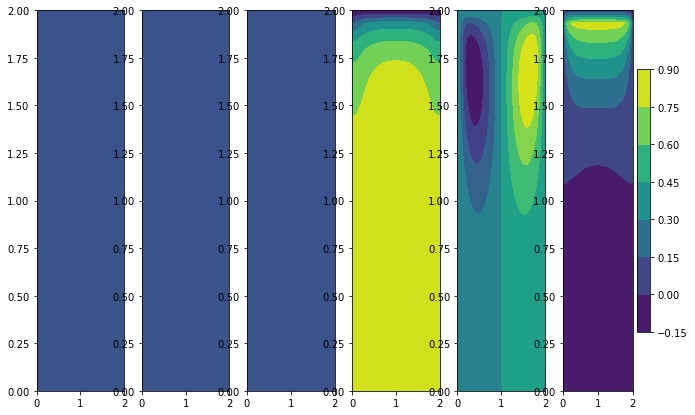

In [187]:
#plot 
v0 = v_init.copy()
u0 = u_init.copy()
p0 = p_init.copy()
b0 = b_init.copy()

fig = plt.figure(figsize=(11,7))
plt.subplot(1,6,1)
plt.contourf(X, Y, p0, cmap=cm.viridis)  
plt.subplot(1,6,2)
plt.contourf(X, Y, v0, cmap=cm.viridis) 
plt.subplot(1,6,3)
plt.contourf(X, Y, u0, cmap=cm.viridis) 

for _ in range(100):
    v = v0.copy()
    u = u0.copy()
    p = p0.copy()
    
    b = create_B(b0,u0,v0,rho,dt,dx,dy)
    p0 = possion(p0,b,50)

    # print(b)
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u0[i,j] = u[i,j] - u[i,j]*(dt/dx)*(u[i,j] - u[i-1,j]) - v[i,j]*(dt/dy)*(u[i,j] - u[i,j-1]) -dt/(rho*2*dx) * (p0[i+1,j] - p0[i-1,j]) + nu * (dt/dx**2) *(u[i+1,j] -2*u[i,j]+u[i-1,j]) + nu * (dt/dy**2) *(u[i,j+1]-2*u[i,j]+u[i,j-1])
            v0[i,j] = v[i,j] - u[i,j]*(dt/dx)*(v[i,j] - v[i-1,j]) - v[i,j]*(dt/dy)*(v[i,j] - v[i,j-1]) -dt/(rho*2*dy) * (p0[i,j+1] - p0[i,j-1]) + nu * (dt/dx**2) *(v[i+1,j] -2*v[i,j]+v[i-1,j]) + nu * (dt/dy**2) *(v[i,j+1]-2*v[i,j]+v[i,j-1])



            u[-1,:] = 1
            u[0,:] = 0
            u[:,-1] = 0
            u[:,0] = 0
            v[-1,:] = 0
            v[0,:] = 0
            v[:,-1] = 0
            v[:,0] = 0
    # print(b)

plt.subplot(1,6,4)
plt.contourf(X, Y, p0, cmap=cm.viridis)  
plt.subplot(1,6,5)
plt.contourf(X, Y, v0, cmap=cm.viridis) 
plt.subplot(1,6,6)
plt.contourf(X, Y, u0, cmap=cm.viridis) 
plt.colorbar()
plt.show()


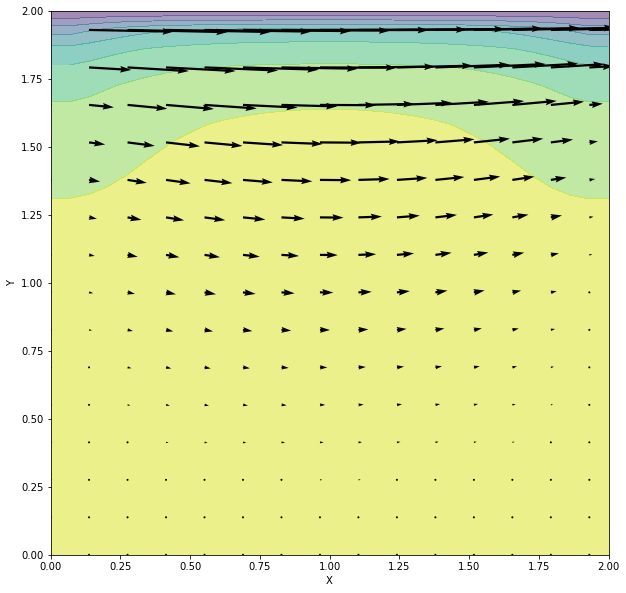

In [186]:
fig = plt.figure(figsize= (10,10))
plt.contourf(X, Y, p0, alpha=0.5, cmap=cm.viridis)  
plt.quiver(X[::2, ::2], Y[::2, ::2], u0[::2, ::2], v0[::2, ::2]) 
plt.xlabel('X')
plt.ylabel('Y')
plt.show()




<ipython-input-105-cf08b832fcb3>:11: UserWarning: No contour levels were found within the data range.
  plt.contour(X,Y,p0)


Text(0, 0.5, 'y')

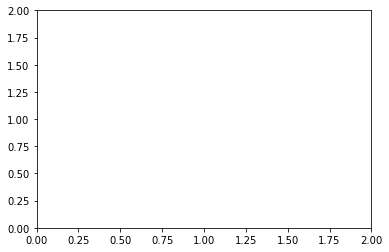

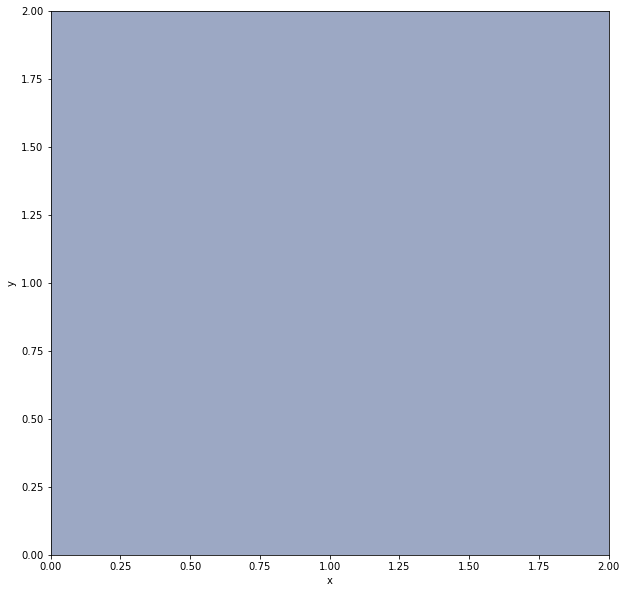

In [105]:
#animate 
v0 = v_init.copy()
u0 = u_init.copy()
p0 = p_init.copy()


fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, 2), ylim=(0, 2))
line = plt.streamplot(X, Y, u0, v0)

plt.figure(figsize= (10,10))
plt.contourf(X,Y,p0,alpha=0.5)
plt.contour(X,Y,p0)  
# plt.quiver(X,Y,u0,v0)
plt.streamplot(X, Y, u0, v0)
plt.xlabel('x')
plt.ylabel('y')


def animate(frames):
    v = v0.copy()
    u = u0.copy()
    p = p0.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            b = create_B(u0,v0,rho,dt,dx,dy)
            # print(b)
            p0[i,j] = 1/4 * (p[i+1,j] + p[i-1,j] + p[i,j+1] +p[i,j-1] - b[i,j]*dy*dx)
            u0[i,j] = u[i,j] - u[i,j]*(dt/h)*(u[i,j] - u[i-1,j]) - v[i,j]*(dt/h)*(u[i,j] - u[i,j-1])- dt/(nu*2*h) * (p[i+1,j] - p[i-1,j]) + nu * (dt/h**2) *(u[i+1,j] -2*u[i,j]+u[i-1,j]) + nu * (dt/h**2) *(u[i,j+1]-2*u[i,j]+u[i,j-1])
            v0[i,j] = v[i,j] - u[i,j]*(dt/h)*(v[i,j] - v[i-1,j]) - v[i,j]*(dt/h)*(v[i,j] - v[i,j-1])- dt/(nu*2*h) * (p[i+1,j] - p[i-1,j]) + nu * (dt/h**2) *(v[i+1,j] -2*v[i,j]+v[i-1,j]) + nu * (dt/h**2) *(v[i,j+1]-2*v[i,j]+v[i,j-1])

            # BC
            p0[-1,:] = 0
            p0[0,:] =  p0[1,:]
            p0[:,0] = p0[:,1]
            p0[:,-1] = p0[:,-2] 

            u[-1,:] = 1 
            u[0,:] = 0
            u[:-1] = 0
            u[:,0] = 0
            v[-1,:] = 0
            v[0,:] = 0
            v[:-1] = 0
            v[:,0] = 0
    


